# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 

## Homework 3: CNN 

**Harvard University**<br/>
**Spring 2019**<br/>
**Instructors:** Pavlos Protopapas and Mark Glickman<br/>

<hr style="height:2pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

<hr style="height:2pt">
### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.

- This homework can be submitted in pairs.

- If you submit individually but you have worked with someone, please include the name of your **one** partner below.
- Please restart the kernel and run the entire notebook again before you submit.

**Names of person you have worked with goes here:**
<br><BR>

<hr style="height:2pt">

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, read_csv

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.optimizers import SGD, Adam, RMSprop
from keras import backend as K 
K.set_image_dim_ordering('tf')

from sklearn.model_selection import cross_val_score, KFold, train_test_split, StratifiedKFold 
from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

from astropy.table import Table

import glob
import h5py    

from PIL import Image
from scipy.misc import toimage
from scipy.signal import convolve2d
import skimage
from skimage import data, io
from skimage.transform import rescale, resize, downscale_local_mean

from matplotlib import pyplot
import matplotlib.pylab as plt 
from IPython.display import Image
%matplotlib inline

# if you do not have skimage then you may install is by running $ conda install -c anaconda scikit-image

Using TensorFlow backend.


<div class="theme"> Overview </div> 


In this homework, we will explore Convolutional Neural Networks (CNNs).  We'll explore the mechanics of convolutional operations, will build a CNN to classify CIFAR-10 images, and will build a CNN for detecting gravitational waves from the LIGO observatory. Specifically, we will use images generated from the raw time series data to train a model that can distinguish between real gravitational events and noise. 

<div class='exercise'><b> Question 1: Convolutional Neural Network Basics [33.333333pts] </b></div>


As you know from lecture, in convolutional neural networks, a convolution is a multiplicative operation on a local region of values. Convolutional layers have shown themselves to have been very useful in image classification, as they allows the network to retain local spatial information for feature extraction.

<span class='sub-q'>**1.1 Calculate Convolutions.**</span>

For the following 2D matrix:

$$
\left( \begin{array}{cccc}
2 & 3 & 2 & 4 \\
3 & 1 & 2 & 2 \\
4 & 1 & 0 & 1 \\
7 & 2 & 1 & 3
\end{array} \right)
$$

you will use the following 2x2 kernel to perform a 2D convolution operation.

$$
\left( \begin{array}{cc}
2 & 1 \\
1 & 3 
\end{array} \right)
$$

Compute this operation by hand assuming a vertical and horizontal stride of 1 as well as a) valid, b) same, and c) full border modes.  For each mode, indicate the shape of the the resulting (post-convolution) matrix and compare it to the shape of the original matrix.

<span class='sub-q'>**1.2 Understanding Pooling Operations.**</span>

Pooling operations are often used in convolutional neural networks to reduce the dimensionality of the feature maps as well as overall network complexity. Two main types of pooling are used: AveragePooling and MaxPooling.

**1.2.1.** Using the matrix below, write the output of the AveragePooling and MaxPooling operations with pool size 2x2 and stride  2x2.

$$
\left( \begin{array}{cccc}
1 & 2 & 2 & 4 \\
3 & 1 & 2 & 1 \\
4 & 1 & 0 & 2 \\
5 & 2 & 2 & 1
\end{array} \right)
$$

**1.2.2.** Repeat 1.2.1 with a stride of size 1.

Consider the following image of a dog:

![dog](data/Kintamani_dog_white_gs.jpeg)

**1.3.1.** Load the image as a 2D Numpy array into the variable `dog_image_data`. Appropriately normalize the image data so that values within `dog_image_data` fall within [-0.5, 0.5].  .

**1.3.2.** Choose three 3x3 convolution kernels (you can look up kernels for edge detection, normalized box blurring, and sharpening, see https://en.wikipedia.org/wiki/Kernel_(image_processing) for example), and apply each of these kernels to the image with same border mode (you may want to implement your own convolution function or try using  [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html)).

**1.3.3.** In the resulting convolved image data matrices, set all pixel values less than zero to zero (using np.clip()). In other words:


`
if x < 0:
    x = 0
else:
    x = x
`

(This is the `ReLU` activation function.)

**1.3.4.** Show plots of the resulting images. 

**1.3.5.** Take a moment to examine the convolved images. You should see that certain features in the puppy are accentuated, while others are de-emphasized. What might be the effect of performing additional convolution operations on these filtered images and how might they relate to additional layers in a neural network?






### Your solutions 

## 1.1 Calculate Convolutions.

**a) Valid:**

$
\left( \begin{array}{cccc}
2 & 3 & 2 & 4 \\
3 & 1 & 2 & 2 \\
4 & 1 & 0 & 1 \\
7 & 2 & 1 & 3
\end{array} \right)
$ * $
\left( \begin{array}{cc}
2 & 1 \\
1 & 3 
\end{array} \right)
$ = $
\left( \begin{array}{cc}
13 & 15 & 16 \\
14 & 5 & 9 \\
22 & 7 & 11
\end{array} \right)
$

* Post-Convolution Shape: 3 X 3

**b) Same**

$
\left( \begin{array}{cccc}
0 & 0 & 0 & 0 & 0 \\
0 & 2 & 3 & 2 & 4 \\
0 & 3 & 1 & 2 & 2 \\
0 & 4 & 1 & 0 & 1 \\
0 & 7 & 2 & 1 & 3
\end{array} \right)
$ * $
\left( \begin{array}{cc}
2 & 1 \\
1 & 3 
\end{array} \right)
$ = $
\left( \begin{array}{cc}
6 & 11 & 9 & 15 \\
11 & 13 & 15 & 16 \\
15 & 14 & 5 & 9 \\
25 & 22 & 7 & 11
\end{array} \right)
$

* Post-Convolution Shape: 4 X 4

**c) Full border**

$
\left( \begin{array}{cccc}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 2 & 3 & 2 & 4 & 0 \\
0 & 3 & 1 & 2 & 2 & 0 \\
0 & 4 & 1 & 0 & 1 & 0 \\
0 & 7 & 2 & 1 & 3 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 
\end{array} \right)
$ * $
\left( \begin{array}{cc}
2 & 1 \\
1 & 3 
\end{array} \right)
$ = $
\left( \begin{array}{cc}
6 & 11 & 9 & 15 & 4 \\
11 & 13 & 15 & 16 & 10 \\
15 & 14 & 5 & 9 & 5 \\
25 & 22 & 7 & 11 & 5 \\
7 & 16 & 5 & 5 & 6
\end{array} \right)
$

* Post-Convolution Shape: 5 X 5

## 1.2.1. Stride 2 X 2

**AveragePooling:**
$$
\left( \begin{array}{cc}
1.75 & 2.25 \\
3 & 1.25 
\end{array} \right)
$$

**MaxPooling:**
$$
\left( \begin{array}{cc}
3 & 4 \\
5 & 2 
\end{array} \right)
$$

## 1.2.2. Stride 1 X 1

**AveragePooling:**
$$
\left( \begin{array}{cc}
1.75 & 1.75 & 2.25 \\
2.25 & 1 & 1.25 \\
3 & 1.25 & 1.25
\end{array} \right)
$$

**MaxPooling:**
$$
\left( \begin{array}{cc}
3 & 2 & 4 \\
4 & 2 & 2 \\
5 & 2 & 2
\end{array} \right)
$$


## 1.3. Dog Image

## 1.3.1. Scale

In [3]:
dog_image_data = plt.imread('data/Kintamani_dog_white_gs.jpeg')[:,:,1]
dog_image_data.shape

(600, 800)

In [4]:
dog_image_data = rescale(dog_image_data, scale=[0.5,0.5], multichannel=False)

C:\Users\Saurabh\Anaconda3\envs\109b\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\Saurabh\Anaconda3\envs\109b\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


C:\Users\Saurabh\Anaconda3\envs\109b\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """Entry point for launching an IPython kernel.


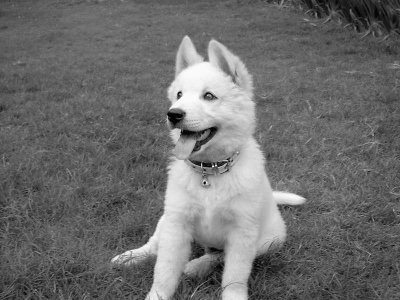

In [6]:
toimage(dog_image_data)

## 1.3.2. Convolutions

In [7]:
# 1.3.2
kernel_edge = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
kernel_blur = np.array([[1,1,1],[1,1,1],[1,1,1]])*(1/9)
kernel_sharp = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
display(kernel_edge)
display(kernel_blur)
display(kernel_sharp)

image_edge = convolve2d(dog_image_data, kernel_edge, mode='same')
image_blur = convolve2d(dog_image_data, kernel_blur, mode='same')
image_sharp = convolve2d(dog_image_data, kernel_sharp, mode='same')

array([[-1, -1, -1],
       [-1,  8, -1],
       [-1, -1, -1]])

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

array([[ 0, -1,  0],
       [-1,  5, -1],
       [ 0, -1,  0]])

## 1.3.3. `ReLU` Activation

In [8]:
# 1.3.3.
image_edge = np.clip(image_edge, a_min=0, a_max=None)
image_blur = np.clip(image_blur, a_min=0, a_max=None)
image_sharp = np.clip(image_sharp, a_min=0, a_max=None)

## 1.3.4. Show Images

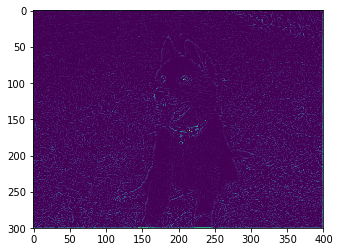

In [9]:
plt.imshow(image_edge)

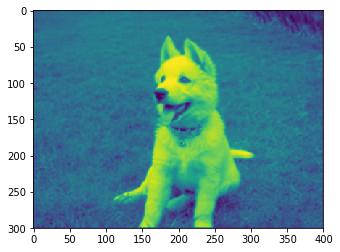

In [10]:
plt.imshow(image_blur)

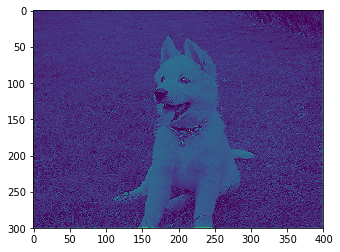

In [11]:
plt.imshow(image_sharp)

## 1.3.5. Examine the images

**Answer:**

<div class='exercise'><b> Question 2: Building a Basic CNN Model [33.33333pts] </b></div>

In this question, you will use Keras to create a convolutional neural network for predicting the type of object shown in images from the [CIFAR-10](https://keras.io/datasets/#cifar10-small-image-classification) dataset, which contains 50,000 32x32 training images and 10,000 test images of the same size, with a total of 10 classes.


<span class='sub-q'> **2.1 Loading CIFAR-1O and Constructing the Model. **</span>

Load CIFAR-10 and use a combination of the [following layers](https://keras.io/layers/convolutional/): Conv2D, MaxPooling2D, Dense, Dropout and Flatten Layers (not necessarily in this order) to build your model.
You may use an existing architecture like AlexNet or VGG16, or create one of your own design. However, you should write your own layers and not use a pre-written implementation.

Convolutional neural networks are very computationally intensive. We highly recommend that you train your model on a system using GPUs. On CPUs, this training can take up to several hours. On GPUs, it can be done within minutes.

You can approach the problems in this question by first creating a model assigning 32 filters to each Conv2D layer recreate the model with 64 filters/layer, 128, etc.  For each generated model, keep track of the total number of parameters.

**2.1.1.** Report the total number of parameters in your model.

**2.1.2.** How does the number of total parameters change (linearly, exponentially) as the number of filters per layer increases?

**2.1.3.** Generate a plot showing the relationship in 2.1.2 and explain what you see.



<span class='sub-q'> **2.2 Choosing a Model, Training and Evaluating It. **</span>

**2.2.1.** Choose a model from 2.1 and train it. You can choose to train your model for as long as you'd like, but you should aim for at least 10 epochs.  Your validation accuracy should exceed 70%. Training for 10 epochs on a CPU should take about 30-60 minutes.

**2.2.2.** Plot the loss and validation accuracy for your chosen architecture.

<span class='sub-q'>**2.3 Using Feature Maps to Visualize the Model.**</span>

We would gain an intution into how our model is processing the inputs in two ways.  First we'll ask you to use feature maps to visualize the activations in the intermediate layers of the network. We've provided a helper function `get_feature_maps` to aid in extracting weights from layers in your model network.  Feel free to take advantage of it if you'd like.  We'll also ask you to use [saliency maps](https://arxiv.org/abs/1312.6034) to visualize the pixels that have the largest impact on the classification of an input (image in this case).

**2.3.1.** For a given input image, use your model and extract 9 feature maps from an intermediate convolutional layer of your choice and plot the images in a 3x3 grid.  Make sure to plot (and clearly label) your original input image as well.

**2.3.2.** For the same input image generate and plot a saliency map to show the pixels in the image most pertinent to classification.  While you're welcome to generate the saliency map by hand, we highly recommend that you install and use [keras-vis](https://github.com/raghakot/keras-vis) and let it handle the generation.

**Hints:**

- If you assign a name to your last layer using the `name` parameter in the `Dense` layer, you'll be able to use the `find_layer_idx` function provided by keras-vis via `vis.utils.utils`
- As the keras-vis docs state: "To visualize activation over final dense layer outputs, we need to switch the softmax activation out for linear since gradient of output node will depend on all the other node activations. Doing this in keras is tricky, so we provide utils.apply_modifications to modify network parameters and rebuild the graph."
- If your model is stored in a variable `model` then the following code will switch the softmax activation.

```
# Swap softmax with linear
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)
```

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

def get_feature_maps(model, layer_id, input_image):
    model_ = Model(inputs=[model.input], outputs=[model.layers[layer_id].output])
    return model_.predict(np.expand_dims(input_image, axis=0))[0,:,:,:].transpose((2,0,1))

*Some imports that will come in handy if you use keras-vis to implement saliency maps*

In [16]:
# ! pip install keras-vis

In [17]:
from vis.visualization import visualize_saliency
from vis.utils import utils
from keras import activations

### Your solutions 

## 2.1. Loading CIFAR-10 and Constructing the Model

In [18]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 77s 0us/step


In [19]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(50000, 32, 32, 3)

(50000, 1)

(10000, 32, 32, 3)

(10000, 1)

In [20]:
n_filters = [32, 64, 128, 256]
models = {}
model_params = {}

for n in n_filters:
    model = Sequential()
    model.add(Conv2D(n, (3, 3), padding='same', activation='relu',
                        input_shape=(32, 32, 3)))
    model.add(Conv2D(n, (3, 3), padding='same', activation='relu', name="Conv_Select"))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(n, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(n, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(n, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(n, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(n, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(n, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.6))
    model.add(Dense(n*4, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(lr=0.001),
                  metrics=['acc'])
    
    # record models and parameters in dictionary
    models[n] = model
    model_params[n] = models[n].count_params()

In [21]:
for n in n_filters:
    models[n].summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
Conv_Select (Conv2D)         (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 8, 8, 32)          9248      
__________

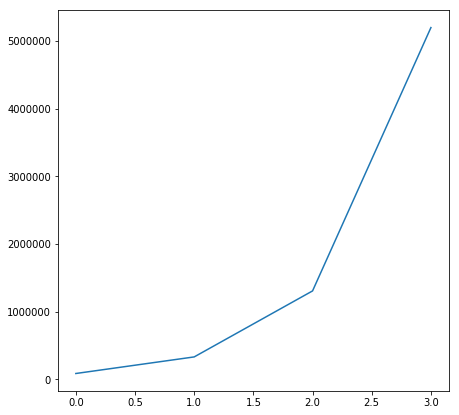

In [22]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
ax.plot(list(model_params.values()))

## 2.2. Choosing a Model, Training and Evaluating It.

## 2.2.1.

In [63]:
model_history = models[64].fit(x=X_train, y=np_utils.to_categorical(y_train),
                             batch_size=4096, epochs=20,
                             validation_data=(X_test, np_utils.to_categorical(y_test))
                            )

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 9s 180us/step - loss: 1.2568 - acc: 0.5540 - val_loss: 1.2368 - val_acc: 0.5639
Epoch 2/20
50000/50000 [==============================] - 9s 180us/step - loss: 1.1687 - acc: 0.5841 - val_loss: 1.2928 - val_acc: 0.5594
Epoch 3/20
50000/50000 [==============================] - 9s 179us/step - loss: 1.2214 - acc: 0.5707 - val_loss: 1.1575 - val_acc: 0.5855
Epoch 4/20
50000/50000 [==============================] - 9s 181us/step - loss: 1.1560 - acc: 0.5903 - val_loss: 1.2542 - val_acc: 0.5519
Epoch 5/20
50000/50000 [==============================] - 9s 181us/step - loss: 1.1750 - acc: 0.5883 - val_loss: 1.0428 - val_acc: 0.6403
Epoch 6/20
50000/50000 [==============================] - 9s 181us/step - loss: 1.0960 - acc: 0.6115 - val_loss: 1.1121 - val_acc: 0.6110
Epoch 7/20
50000/50000 [==============================] - 9s 181us/step - loss: 1.0760 - acc: 0.6204 - val_loss: 1.2140 - 

## 2.2.2.

Text(0.5, 0, 'Epoch')

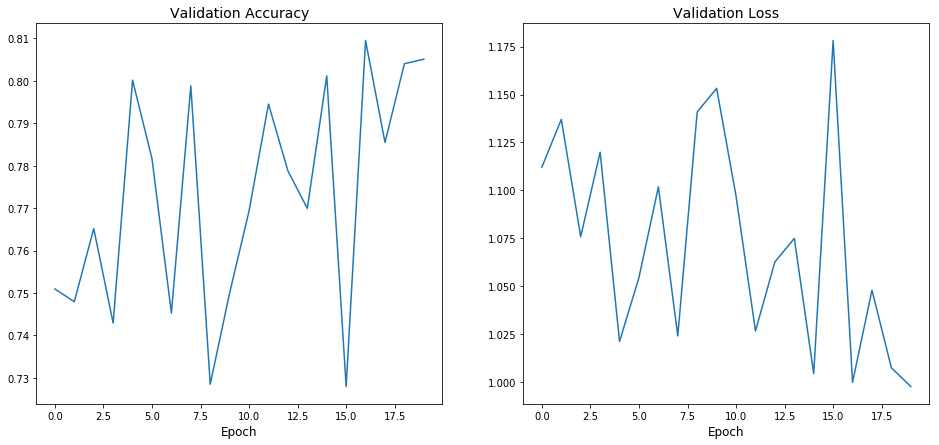

In [64]:
fig, ax = plt.subplots(1,2, figsize=(16,7))

ax[0].plot(np.sqrt(model_history.history['val_acc']))
ax[0].set_title('Validation Accuracy', fontsize=14)
ax[0].set_xlabel('Epoch', fontsize=12)

ax[1].plot(np.sqrt(model_history.history['val_loss']))
ax[1].set_title('Validation Loss', fontsize=14)
ax[1].set_xlabel('Epoch', fontsize=12)

## 2.3. Using Feature Maps to Visualize the Model.

## 2.3.1.

/home/srk-apts/anaconda3/envs/109b/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


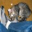

In [65]:
utils.find_layer_idx(model_64, 'Conv_Select')
toimage(X_test[0])

/home/srk-apts/anaconda3/envs/109b/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  """


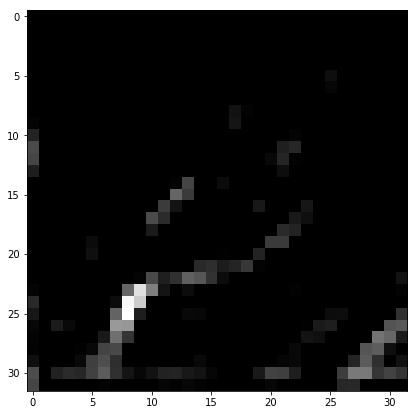

In [82]:
layer_idx = utils.find_layer_idx(model_64, 'Conv_Select')
image = X_test[0]
fig, ax = plt.subplots(1,1, figsize=(7,7))
feature_map = get_feature_maps(model=models[64], layer_id=layer_idx, input_image=image)
ax.imshow(toimage(feature_map[0]))

## 2.3.1.

In [ ]:
model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

In [85]:
layer_idx=utils.find_layer_idx(models[64], 'Conv_Select')

In [86]:
grads = visualize_saliency(models[64], layer_idx, filter_indices=0, 
                              seed_input=image)

InvalidArgumentError: conv2d_227_input:0 is both fed and fetched.

InvalidArgumentError: conv2d_87_input:0 is both fed and fetched.

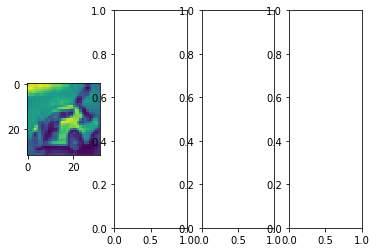

In [86]:
for class_idx in np.arange(10):    
    indices = np.where(y_test[:, class_idx] == 1.)[0]
    idx = indices[0]

    f, ax = plt.subplots(1, 4)
    ax[0].imshow(X_test[idx][..., 0])
    
    for i, modifier in enumerate([None, 'guided', 'relu']):
        grads = visualize_saliency(model_64, layer_idx, filter_indices=class_idx, 
                              seed_input=X_train[idx], backprop_modifier=modifier)        
        if modifier is None:
            modifier = 'vanilla'
        ax[i+1].set_title(modifier)    
        ax[i+1].imshow(grads, cmap='jet')

In [ ]:
visualize_saliency(model_64, layer_idx=utils.find_layer_idx(model_64, 'Conv_Select'), 
                  )

## Gravitational Waves
Gravitational waves are a prediction of Einstein's Genaral Relativity theory.  They are ripples on the space-time, propagating at the speed of light, caused by the merging of two massive obejcts (e. g. black holes, white dwarves, pulsars) .

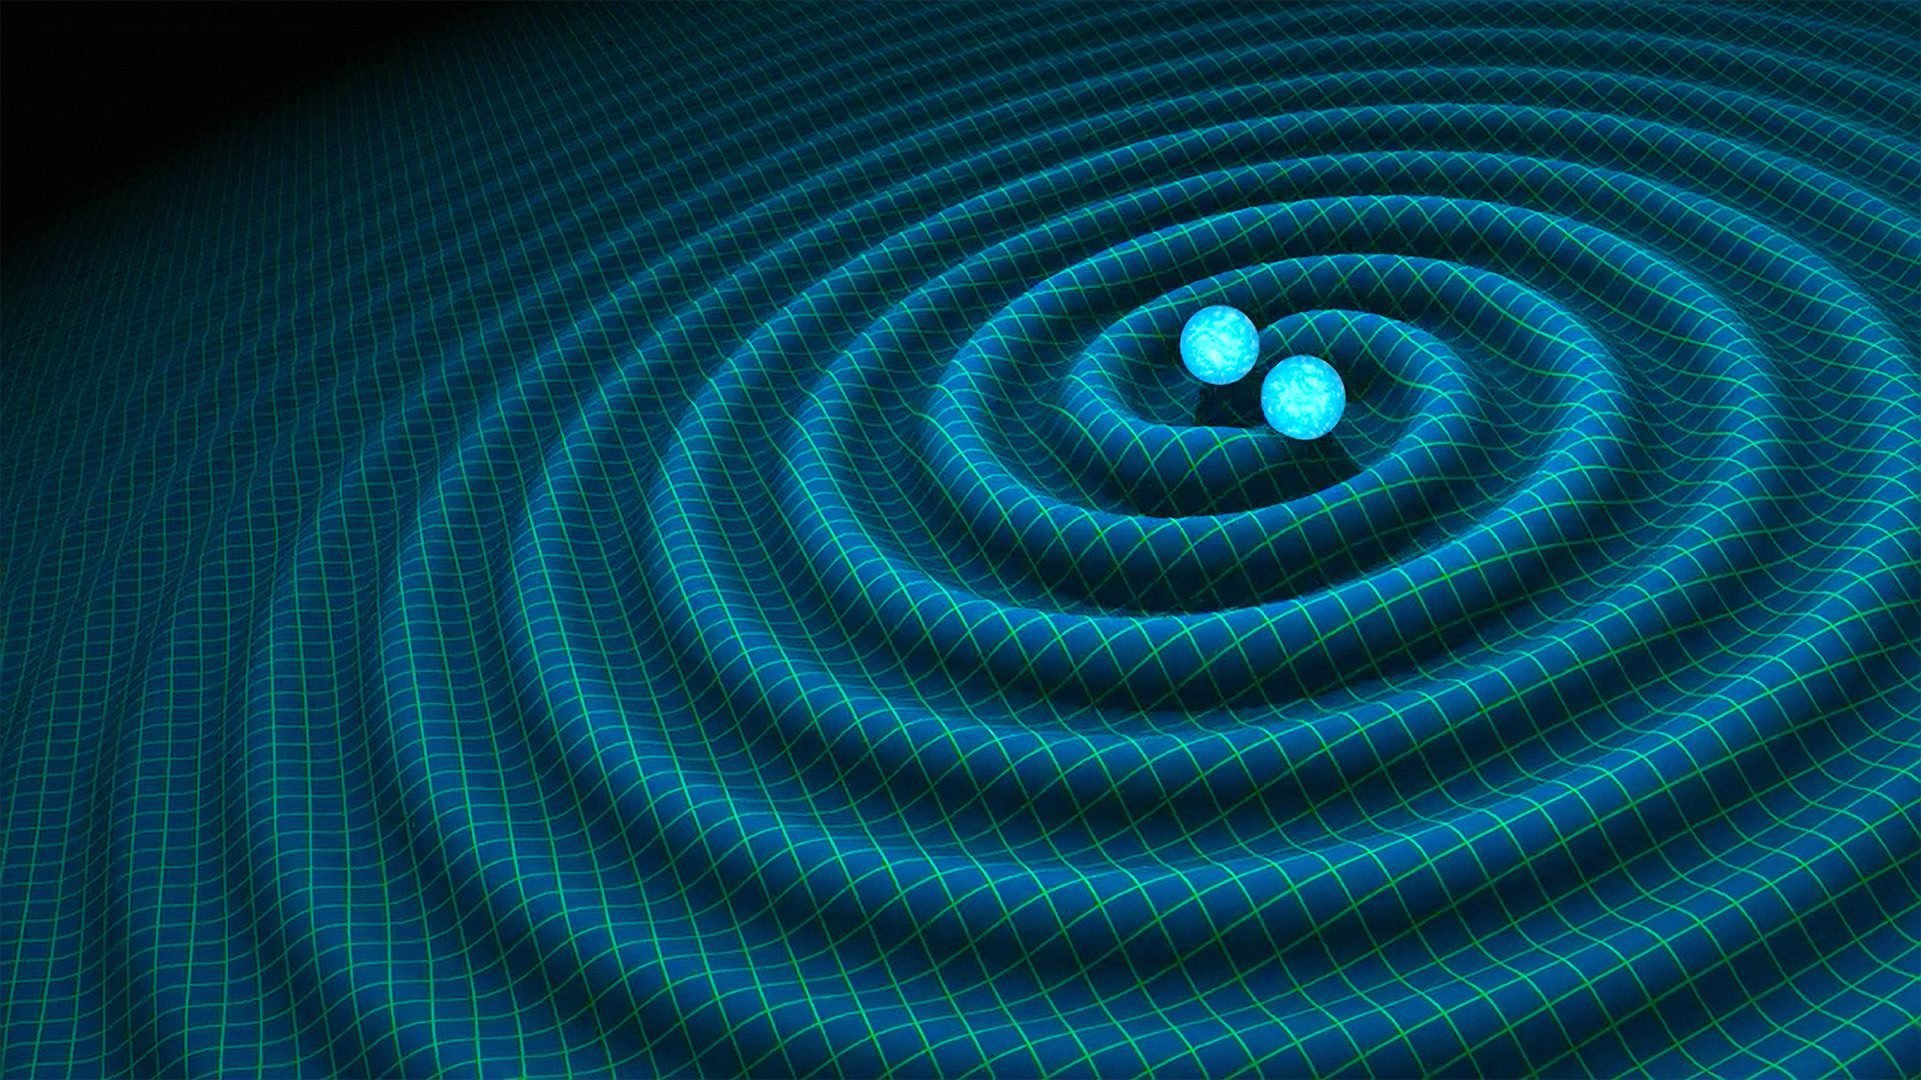

In [6]:
Image('data/gravitational-waves-generated-by-binary-neutron-stars.jpg',width=1000)

### LIGO observatory
The Laser Interferometer Gravitational-Wave Observatory (LIGO) was designed for the direct detection of gravitational waves. It is made up of two identical and widely separated interferometers that look like this: 

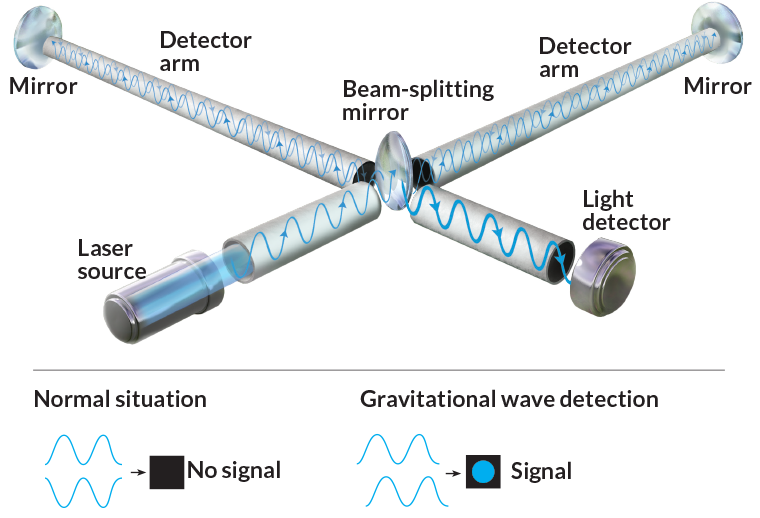

In [7]:
Image('data/100317_nobel-physics_inline_ligo-diagram.png', width=1000)

Image credit: NICOLLE RAGER FULLER

### Nobel Price Physics:
Rainer Weiss, Barry Barish, and Kip Thorne won the 2017 Nobel Prize in Physics for their work on GWs

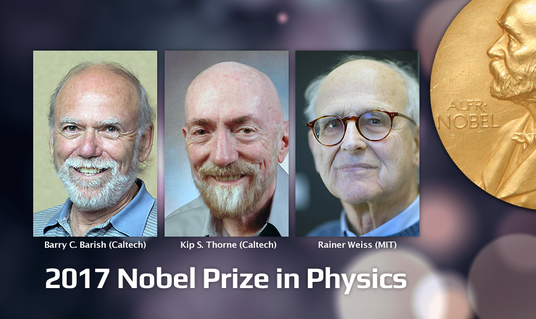

In [16]:
Image('data/Nobel-barish-thorne-weiss_edit.png', width=600)

Image credit: LIGO/Caltech/MIT

### What do Gravitation Wave signals look like?

This is the data from the first GW detection. The first row shows the time series observed, the second the expected signal from simulations, and the third the intensity of each frequency in time from the observed data. The left column corresponds to the Hanford detector in Washington, and the right column to the Livingston detector in Louisiana.  The GW was seen by both detectors, as expected for a real event.

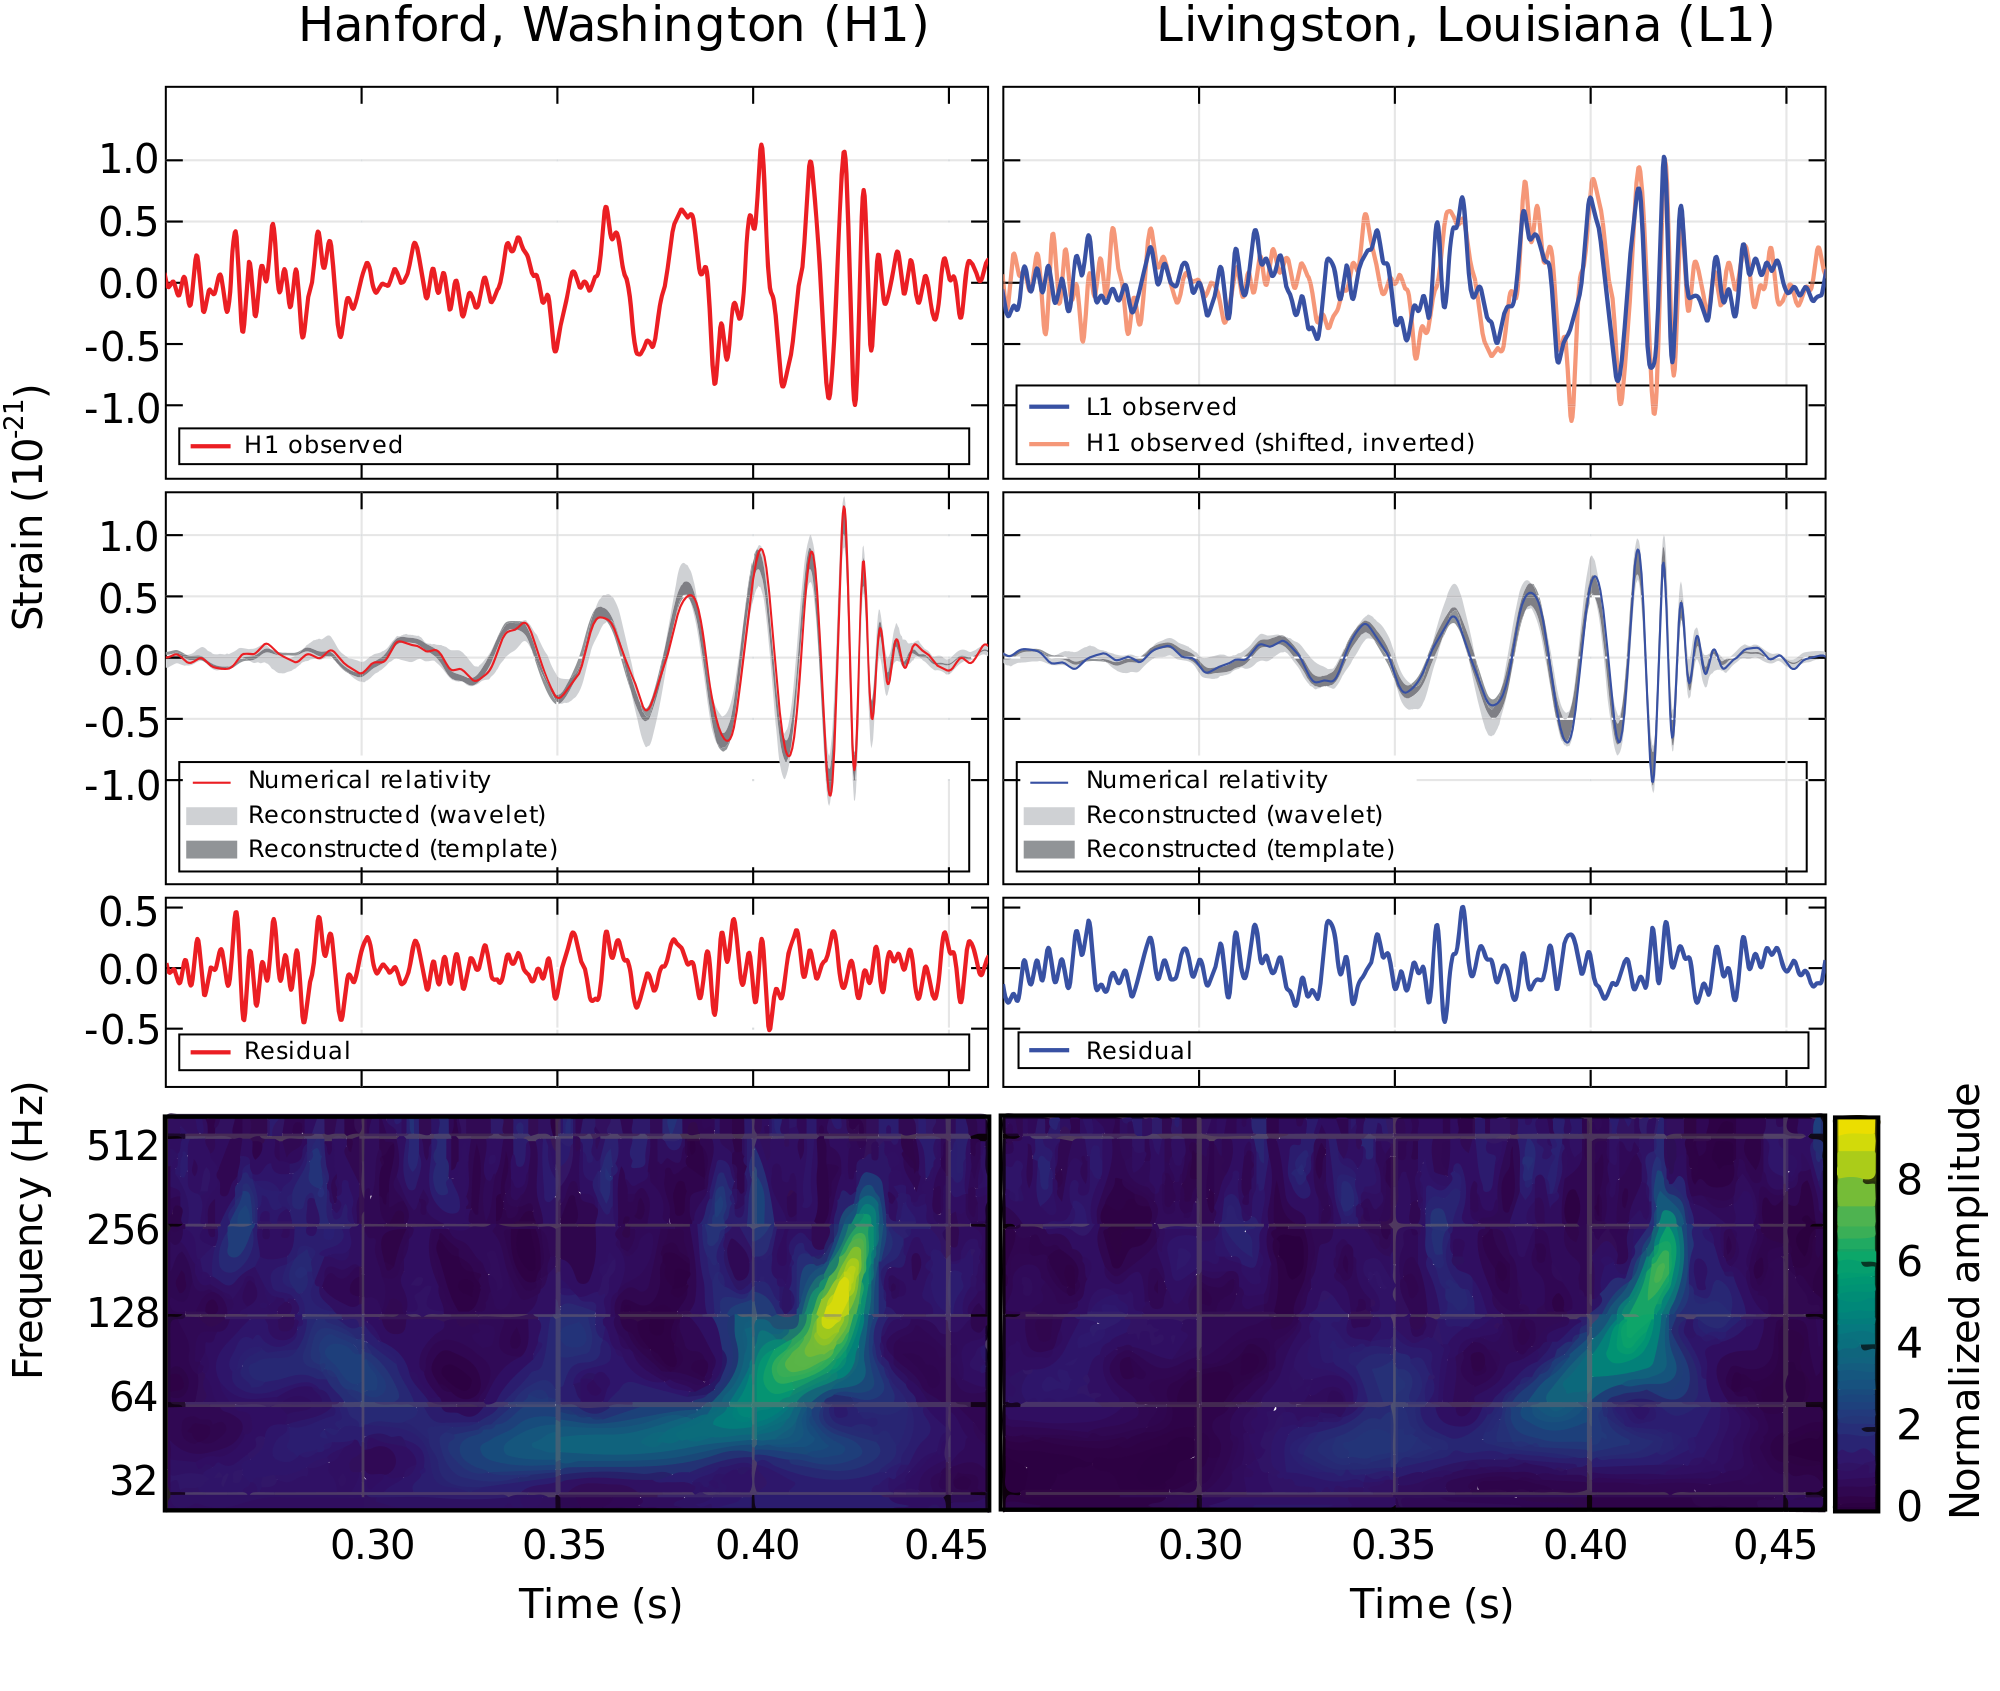

In [17]:
Image('data/LIGO_measurement_of_gravitational_waves.svg.png', width=1100)

Phys. Rev. Lett. 116, 061102 (2016) (https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.116.061102)

<div class='exercise'><b> Question 3: Building a CNN for Classification of Gravity Wave Events [33.3333 pts] </b></div>

You have built, trained, evaluated and inspected neural networks on a few common datasets such as MNIST or CIFAR10. Now it's time to try a real-world dataset. We want you to consider the problem of classifying images as either gravitational waves or non-detection events using images from two detectors, one from the LIGO Hanford and LIGO Livingston.

 You may find it helpful to gain some domain knowledge on gravitational wave detection. Browse through the information at the following links:



- https://www.ligo.caltech.edu/page/gravitational-waves 
- https://www.zooniverse.org/projects/zooniverse/gravity-spy 

Choose appropriate methods and visualizations to draw conclusions and answer the following questions.

<span class='sub-q'>**3.1 Learn about Gravitational Wave Detection. Load and Clean the Data.**</span>

**3.1.1** Why do you think it is important to have data from both detectors? How might you combine observations from the two detectors into a single observation? 

We've provided you with two files containing data in the form of numpy objects:

- 'data/GW_aug.npy' (data about Gravitational Wave events)

- 'data/ND_aug.npy' (data about non-detection events)  

**3.1.2** Load and read these data files into variables named `GW` and `ND` respectively. Visualize the differences between the two types of signals and then combine and prepare them for the NN by a) making a numerical response variable that is 1 for `GWs` and 0 for `ND` and b) splitting in `X_train`, `y_train`, `X_test`, and `y_test`. Have 20% of your data be in the test set.

**Hints**:
  - Scale and shuffle the data before you create the training and testing sets. 
    

<span class='sub-q'> **3.2 Build a CNN Model for GW detection.**</span>

Build a CNN Model to automatically classify event as a GW or an ND. Use a combination of layers such as Conv2D, MaxPooling2D, Dense, Dropout and Flatten Layers (not necessarily in this order). 

Summarize your results in a short report. Explain why you chose the architecture you did, described what worked and what didn't. Also describe how did you proceeded to inspect your network as in Q2.


<hr> 
### Your solutions 
<hr>

In [3]:
pd.DataFrame('data/GW.npy')

ValueError: DataFrame constructor not properly called!